# Weekly project 6
Today we will continue work from monday.
We will follow the style of last week.

Weekly project:
- You will need to implement your own k-means algorithm. (So you are not allowed to use the one in *sklearn*
- it should be able to cluster each of the different figures.
- Extend your k-means so it finds the optimal amount of clusters.
Challenge
- Implement the mean shift clustering algorithm


In [1]:
import numpy as np
import open3d as o3d
import copy
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans, k_means

%matplotlib notebook

def draw_labels_on_model(pcl, labels):
    cmap = plt.get_cmap("tab20")
    pcl_temp = copy.deepcopy(pcl)
    max_label = labels.max()
    colors = cmap(labels / (max_label if max_label > 0 else 1))
    colors[labels < 0] = 0
    pcl_temp.colors = o3d.utility.Vector3dVector(colors[:, :3])
    o3d.visualization.draw_geometries([pcl_temp])

d = 4
mesh = o3d.geometry.TriangleMesh.create_tetrahedron().translate((-d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_octahedron().translate((0, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_icosahedron().translate((d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_torus().translate((-d, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_moebius(twists=1).translate((0, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_moebius(twists=2).translate((d, -d, 0))

# draw the shapes
o3d.visualization.draw_geometries([mesh])


## apply k means on this
point_cloud = mesh.sample_points_uniformly(int(1e3))
pcl = np.asarray(point_cloud.points)

labels = np.zeros(pcl.shape[0])

#draw the sampled image
draw_labels_on_model(point_cloud, labels)

# Define 3D k-means

km = KMeans(n_clusters=6, init='random',
            n_init=10, max_iter=300, tol=1e-04, random_state=0)
            
            It is an iterative process:
• Step 1:
– Randomly initialize k
cluster centers

• Step 2:
– Assign each to its
nearest cluster center

• Step 3:
– Re-compute each
cluster-center as the
centroid of all points
assigned to each cluster

• Step 4:
– Check convergence/stop
criterion, otherwise
repeat Steps 2-4

In [101]:
def kmeans(data, k, max_iter, thresh):
    
    # 0) Init
    iterations = 0
    iter_old = 0
    labels = np.zeros(data.shape[0], int)

    # 1) random init of k points
    rand_idx = np.random.randint(low = 0, high = data.shape[0], size = [k,1])

    center = data[rand_idx,:]


    while iterations < max_iter:

        iterations = iterations +1


        # 2) assign each point to its nearest cluster

        dist = np.linalg.norm(data-center, axis = 2)
        #print('dist shape: ', dist.shape)
        for pt in range(len(data)):
            labels[pt] = (np.argmin(dist[:,pt]))
        # print('labels: ', labels)

        
        # 3) calculate new center
        center_new = np.zeros_like(center)
        for l in range(k):
            center_new[l] = np.mean(data[labels == l,:],axis=0)


        # 4) check stop criterion
        if thresh is not None:
            diff = np.sum(abs(center-center_new))

            if diff < thresh:
                print('break after %d iterations' %iterations)
                break
            else:
                center = center_new

        #     if iterations-iter_old >= 500:
        #         iter_old = iterations
        #         draw_labels_on_model(point_cloud, labels)  


        center = center_new

    return labels, center

In [16]:
# data = pcl
# k = 6

# max_iter = 1000

# thresh = 0.00000001

# # 0) Init
# iterations = 0
# iter_old = 0
# labels = np.zeros(data.shape[0], int)

# # 1) random init of k points
# rand_idx = np.random.randint(low = 0, high = data.shape[0], size = [k,1])

# center = data[rand_idx,:]


# while iterations < max_iter:
    
#     iterations = iterations +1
    
 
#     # 2) assign each point to its nearest cluster

#     dist = np.linalg.norm(data-center, axis = 2)
#     #print('dist shape: ', dist.shape)
#     for pt in range(len(data)):
#         labels[pt] = (np.argmin(dist[:,pt]))
#     # print('labels: ', labels)
    
#     #draw the sampled image
#     # draw_labels_on_model(point_cloud, labels)

#     # 3) calculate new center
#     center_new = np.zeros_like(center)
#     for l in range(k):
#         center_new[l] = np.mean(data[labels == l,:],axis=0)
    

#     # 4) check stop criterion
    
#     diff = np.sum(abs(center-center_new))
    
#     if diff < thresh:
#         print('break after %d iterations' %iterations)
#         break
#     else:
#         center = center_new
    
# #     if iterations-iter_old >= 500:
# #         iter_old = iterations
# #         draw_labels_on_model(point_cloud, labels)  
    

#     center = center_new

# # return labels

# #draw_labels_on_model(point_cloud, labels)     
    


In [4]:
# draw_labels_on_model(point_cloud, labels)

In [82]:
data = pcl
k = 6
labels = np.zeros(data.shape[0], int)
max_iter = 2000

thresh = 1e-6

labels, center = kmeans(data, k, max_iter, thresh)


break after 19 iterations


In [83]:
draw_labels_on_model(point_cloud, labels)

In [85]:
labels.shape

(1000,)

In [87]:
(data-center).shape

(6, 1000, 3)

### Elbow plot

break after 2 iterations
break after 5 iterations
break after 19 iterations
break after 12 iterations
break after 18 iterations
break after 9 iterations
break after 12 iterations
break after 43 iterations
break after 14 iterations
break after 19 iterations


<IPython.core.display.Javascript object>


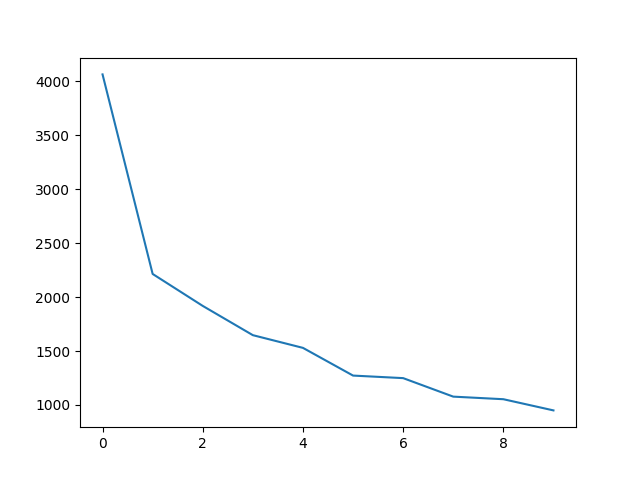

In [57]:
max_cluster = 10

dist= np.zeros(max_cluster)


for num_cluster in range(max_cluster):
    labels, center = kmeans(data, num_cluster+1, max_iter, thresh)
    #draw_labels_on_model(point_cloud, labels)
    #print(center)
    # claculate distortion
    dist_k_sum = 0
    for l in range(num_cluster+1):
        dist_vec_l = np.linalg.norm(data[labels == l,:]-center[l,:],axis=1)
        dist_k_sum = sum(dist_vec_l)+ dist_k_sum
        
    #write the sum for each k in a vector
    dist[num_cluster]= dist_k_sum


plt.figure()
plt.plot(range(0,max_cluster),dist)
plt.show()

break after 2 iterations
break after 5 iterations
break after 21 iterations
break after 28 iterations
break after 13 iterations
break after 17 iterations
break after 16 iterations
break after 20 iterations
break after 32 iterations
break after 21 iterations


<IPython.core.display.Javascript object>


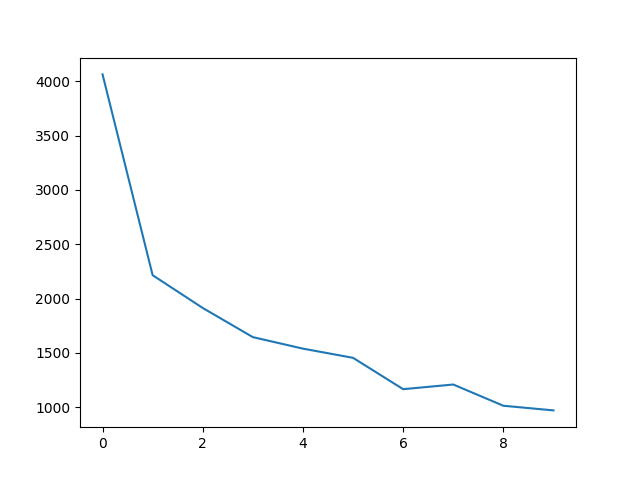

In [58]:
def elbowplt(max_cluster):
    dist= np.zeros(max_cluster)


    for num_cluster in range(max_cluster):
        labels, center = kmeans(data, num_cluster+1, max_iter, thresh)
        #draw_labels_on_model(point_cloud, labels)
        #print(center)
        # claculate distortion
        dist_k_sum = 0
        for l in range(num_cluster+1):
            dist_vec_l = np.linalg.norm(data[labels == l,:]-center[l,:],axis=1)
            dist_k_sum = sum(dist_vec_l)+ dist_k_sum

        #write the sum for each k in a vector
        dist[num_cluster]= dist_k_sum


    plt.figure()
    plt.plot(range(0,max_cluster),dist)
    plt.show()

In [54]:
elbowplt()

array([   0.        , 1441.75730036, 1387.41146484, 1394.07847914,
       1041.32835187, 1185.99848151, 1190.40905781,  924.55546588,
        989.40421494,  893.88894551])

Compare to scipy implementation

In [8]:
km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=max_iter, tol=thresh, random_state=0)

labels = km.fit_predict(data)
draw_labels_on_model(point_cloud, labels)

## Mean shift


The mean shift algorithm seeks modes of the given set of points
1. Choose kernel and bandwidth
2. For each point:

    a) Center a window on that point
    
    b) Compute the mean of the data in the search window
    
    c) Center the search window at the new mean location
    
    d) Repeat (b,c) until convergence
    
3. Assign points that lead to nearby modes to the same cluster

In [142]:
bw = 1
kernel = 1

thresh

# 2a) calc distance
i=0
pt = data[i,:]

dist = np.linalg.norm(data-pt, axis = 1)
inlier = pt.reshape(1,-1)
for idx,d in enumerate(dist):
    if d <= bw:
        inlier = np.concatenate((inlier,data[idx,:].reshape(1,-1)),axis=0)
while stop_crit is False:
    #2b) compute centroid
    centroid = np.mean(inlier, axis=0)

    # 2c) compute new inliers
    inlier = centroid.reshape(1,-1)
    for idx,d in enumerate(dist):
        if d <= bw:
            inlier = np.concatenate((inlier,data[idx,:].reshape(1,-1)),axis=0)
    centroid_new = np.mean(inlier, axis=0)
    
    if abs(centroid_new-centroid) < thresh:
        stop_crit = True




In [132]:
data[idx,:].shape

(3,)

In [139]:
(inlier.shape)

(42, 3)

In [130]:
data.shape

(1000, 3)

In [143]:
centroid

array([-4.05687979, -0.18565998, -0.10895574])

In [135]:
pt.reshape(1,-1).shape

(1, 3)